In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2668,2023-08-14,1909.300049,1912.599976,1903.300049,1910.599976,1910.599976,46
2669,2023-08-15,1906.000000,1907.699951,1895.000000,1902.500000,1902.500000,73
2670,2023-08-16,1904.500000,1904.500000,1890.300049,1896.099976,1896.099976,22
2671,2023-08-17,1893.699951,1902.400024,1884.000000,1884.099976,1884.099976,245


In [4]:
gold_price = gold[['Date','Close']]

In [5]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [6]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

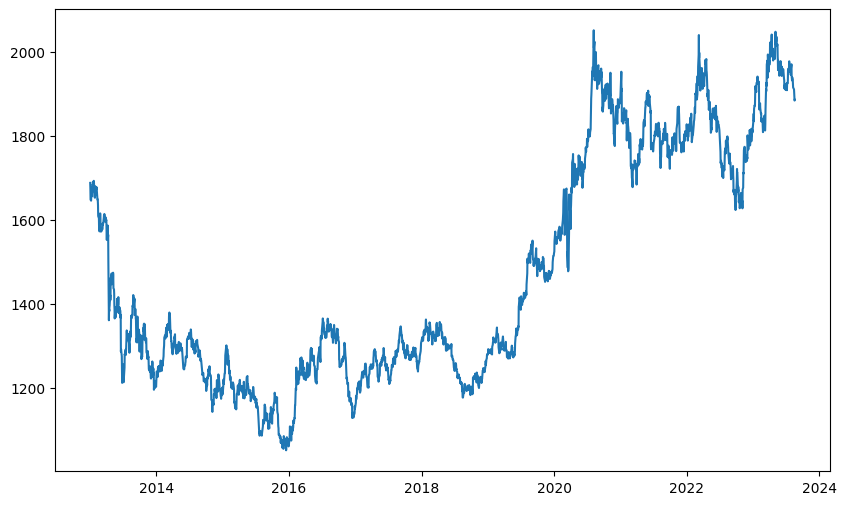

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(gold_price['Date'],gold_price['Close'])

In [8]:
gold_price.shape

(2673, 2)

In [9]:
gold_train=gold_price.head(1870)

In [23]:
gold_train

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
1865,2020-06-04,1718.900024
1866,2020-06-05,1676.199951
1867,2020-06-08,1698.300049
1868,2020-06-09,1714.699951


In [10]:
gold_test = gold_price.tail(803)

In [11]:
import pmdarima as pm

In [24]:
best_model = pm.auto_arima(gold_price['Close'],trace=True,error_action='ignore',suppress_warnings=True)
print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22016.007, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22015.214, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22013.871, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22013.827, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22013.280, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22015.798, Time=1.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 6.861 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2673
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11005.640
Date:                Wed, 23 Aug 2023   AIC                          22013.280
Time:                        21:03:44   BIC                          22019.171
Sample:                             0   HQIC                         22015.412
    

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
model_arima = ARIMA(gold_train['Close'],order=(0,1,0))

In [26]:
model_fit = model_arima.fit()

In [27]:
forecast_steps = len(gold_test)
forecast = model_fit.forecast(steps=forecast_steps)

In [28]:
print(forecast)

1870    1713.300049
1871    1713.300049
1872    1713.300049
1873    1713.300049
1874    1713.300049
           ...     
2668    1713.300049
2669    1713.300049
2670    1713.300049
2671    1713.300049
2672    1713.300049
Name: predicted_mean, Length: 803, dtype: float64


In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse = mean_squared_error(gold_test['Close'], forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 154.92466275967428


In [31]:
gold_test['Close'].mean()

1839.766996656824

In [32]:
mse

24001.651131198803

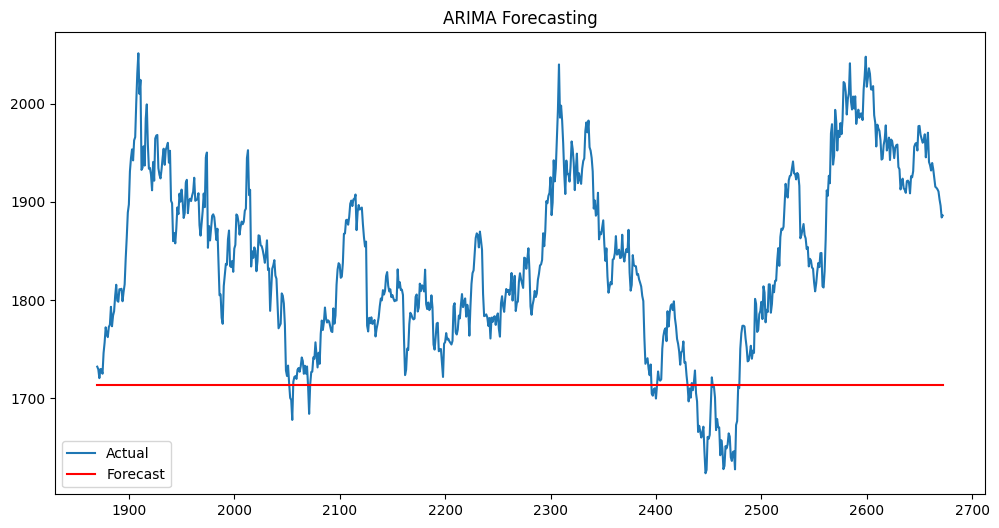

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(gold_test.index, gold_test['Close'], label='Actual')
plt.plot(gold_test.index, forecast, color='red', label='Forecast')
plt.legend()
plt.title('ARIMA Forecasting')
plt.show()